### Problem Statement
We have run a market advertising conpaign for our client esteemed product on two different platforms. One platform was facebook and another one was google Adwords . Our task is to determine compaign on which one is more effective in terms of clicks , ROI , conversions and overall profitable for the client. By identifying the most effective platform we can allocate resources more efficiently and optimise our strategies to deliver much better results to our client.

## Information about the Dataset

Key features of the dataset are as follows:
DATE : 
AD VIEWS : The no.of times the ad was viewed.
AD CLICKS : The no.of clicks received on the ad.
AD CONVERSIONS : The number of conversions resulting from the ad.
COST PER AD : The costs associated for running the ad.
CLICK THROUGH RATE : The ratio of clicks to views , indicating the effectiveness of the ad in generating clicks.
CONVERSION RATE : The ratio of conversions to clicks , indicating the effectiveness of the ad in driving desired actions.
COST PER CLICK : The avg cost incurred per click on the ad.

In [5]:
#Importing Important Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import warnings
warnings.filterwarnings('ignore')

In [6]:
# importing the dataset
df_mar = pd.read_csv("marketing_campaign.csv")
df_mar.head()

,Date,Facebook Ad Campaign,Facebook Ad Views,Facebook Ad Clicks,Facebook Ad Conversions,Cost per Facebook Ad,Facebook Click-Through Rate (Clicks / View),Facebook Conversion Rate (Conversions / Clicks),Facebook Cost per Click (Ad Cost / Clicks),AdWords Ad Campaign,AdWords Ad Views,AdWords Ad Clicks,AdWords Ad Conversions,Cost per AdWords Ad,AdWords Click-Through Rate (Clicks / View),AdWords Conversion Rate (Conversions / Click),AdWords Cost per Click (Ad Cost / Clicks)
0,1/1/2019,FB_Jan19,2116,18,8,$126,0.83%,42.73%,$7.14,AW_Jan19,4984,59,5,$194,1.18%,8.40%,$3.30
1,1/2/2019,FB_Jan19,3106,36,12,$104,1.15%,34.04%,$2.91,AW_Jan19,4022,71,6,$75,1.77%,7.80%,$1.05
2,1/3/2019,FB_Jan19,3105,26,8,$102,0.84%,31.45%,$3.89,AW_Jan19,3863,44,4,$141,1.13%,9.59%,$3.23
3,1/4/2019,FB_Jan19,1107,27,9,$71,2.45%,34.76%,$2.62,AW_Jan19,3911,49,5,$141,1.26%,11.08%,$2.86
4,1/5/2019,FB_Jan19,1317,15,7,$78,1.10%,47.59%,$5.38,AW_Jan19,4070,55,7,$133,1.36%,12.22%,$2.40


In [7]:
df_mar.shape

(365, 17)

# 1.Understanding the Data - Exploratory Data Analysis

In [9]:
df_mar.shape
df_mar.dtypes

Date                                               object
Facebook Ad Campaign                               object
Facebook Ad Views                                   int64
Facebook Ad Clicks                                  int64
Facebook Ad Conversions                             int64
Cost per Facebook Ad                               object
Facebook Click-Through Rate (Clicks / View)        object
Facebook Conversion Rate (Conversions / Clicks)    object
Facebook Cost per Click (Ad Cost / Clicks)         object
AdWords Ad Campaign                                object
AdWords Ad Views                                    int64
AdWords Ad Clicks                                   int64
AdWords Ad Conversions                              int64
Cost per AdWords Ad                                object
AdWords Click-Through Rate (Clicks / View)         object
AdWords Conversion Rate (Conversions / Click)      object
AdWords Cost per Click (Ad Cost / Clicks)          object
dtype: object

In [10]:
# changing date to datetime
df_mar['Date'] = pd.to_datetime(df_mar['Date'])
df_mar.describe()

,Date,Facebook Ad Views,Facebook Ad Clicks,Facebook Ad Conversions,AdWords Ad Views,AdWords Ad Clicks,AdWords Ad Conversions
count,365,365.000000,365.000000,365.000000,365.00000,365.000000,365.000000
mean,2019-07-02 00:00:00,2179.687671,44.049315,11.742466,4717.19726,60.383562,5.980822
min,2019-01-01 00:00:00,1050.000000,15.000000,5.000000,3714.00000,31.000000,3.000000
25%,2019-04-02 00:00:00,1656.000000,35.000000,10.000000,4247.00000,49.000000,5.000000
50%,2019-07-02 00:00:00,2202.000000,43.000000,12.000000,4711.00000,60.000000,6.000000
75%,2019-10-01 00:00:00,2717.000000,54.000000,13.000000,5190.00000,73.000000,7.000000
max,2019-12-31 00:00:00,3320.000000,73.000000,19.000000,5760.00000,89.000000,9.000000
std,NaN,618.074639,12.140559,2.924786,561.11406,14.368225,1.628106


### Observations from dataset
1. Data is having 365 rows means it has info about all the days of 2019.
2. datatypes of sum numeric is in object which needs to be converted and date needs to be converted into datetime .
3. By looking at the descriptive analytics views of ADwords > views of Facebook , clicks of Adwords > clicks of Facebook

## Comparing Compaign Performances 

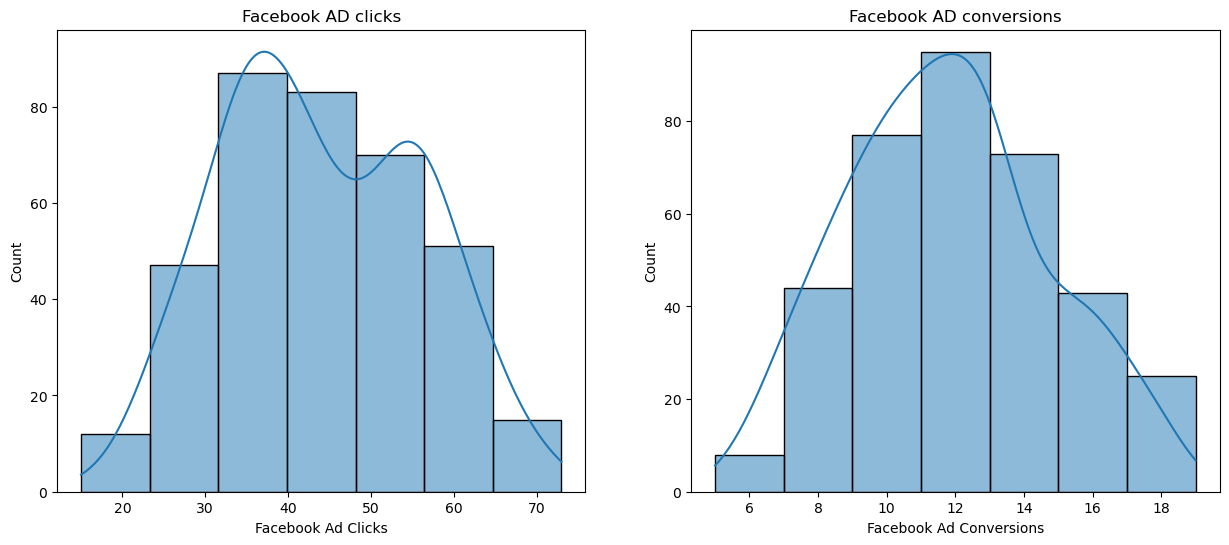

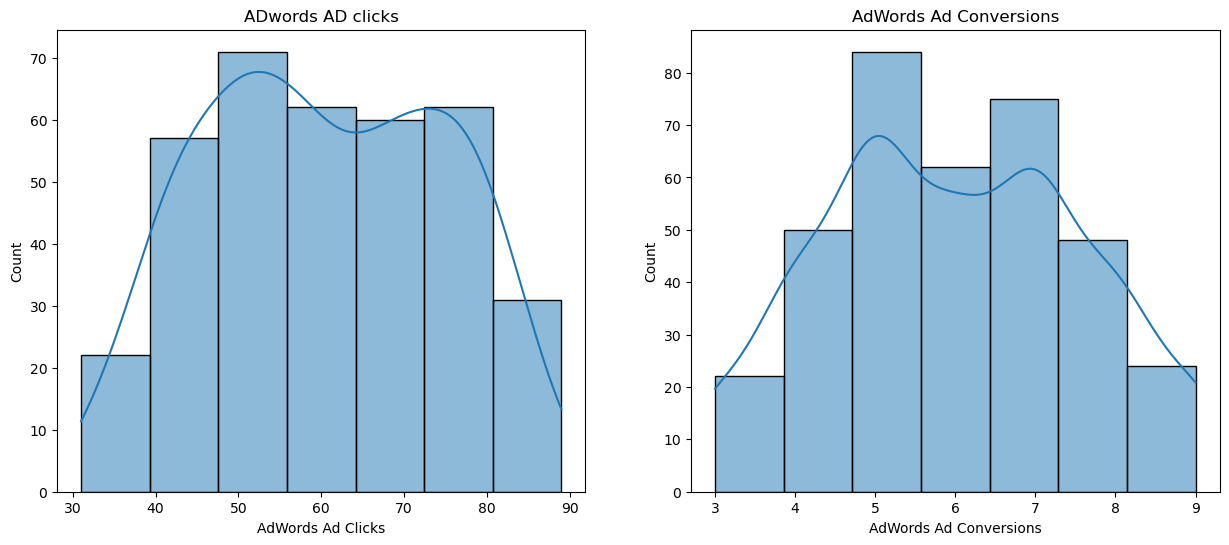

In [13]:
# distribution of clicks and conversions
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.title("Facebook AD clicks")
sns.histplot(df_mar['Facebook Ad Clicks'],bins = 7,edgecolor = 'k',kde = True)
plt.subplot(1,2,2)
plt.title("Facebook AD conversions")
sns.histplot(df_mar['Facebook Ad Conversions'],bins = 7 , edgecolor = 'k',kde = True)
plt.show()

plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.title('ADwords AD clicks')
sns.histplot(df_mar['AdWords Ad Clicks'],bins= 7 , edgecolor= 'k',kde = True)
plt.subplot(1,2,2)
plt.title("AdWords Ad Conversions")
sns.histplot(df_mar['AdWords Ad Conversions'],bins = 7,edgecolor = 'k',kde = True)
plt.show()

## Observations from graphs
1. Facebook ad clicks and facebook ad conversions are normal distributions.
2. ADwords clicks and facebook ad conversions are symmetrical.
3. No outliers are seen in both of them.

### Finding frequency of days with high conversions and low ocnversions.

In [16]:
def create_conv_cat(conversion_col):
    category = []
    for conversion in df_mar[conversion_col]:
        if conversion < 6:
            category.append('less then 6')
        elif 6<=conversion < 11:
            category.append('6 - 10')
        elif 11 <=conversion < 16:
            category.append('10 - 15')
        else:
            category.append('more than 15')
    return category

df_mar['Facebook Conversion Category'] = create_conv_cat('Facebook Ad Conversions')
df_mar['Adwords Conversion Category'] = create_conv_cat('AdWords Ad Conversions')

In [17]:
df_mar['Facebook Conversion Category'].value_counts()

Facebook Conversion Category
10 - 15         189
6 - 10          128
more than 15     47
less then 6       1
Name: count, dtype: int64

In [18]:
facebook = pd.DataFrame(df_mar['Facebook Conversion Category'].value_counts()).reset_index().rename(columns={"Facebook Conversion Category":"Category"})
facebook

,Category,count
0,10 - 15,189
1,6 - 10,128
2,more than 15,47
3,less then 6,1


In [19]:
df_mar['Adwords Conversion Category'].value_counts()

Adwords Conversion Category
6 - 10         209
less then 6    156
Name: count, dtype: int64

In [20]:
Adwords = pd.DataFrame(df_mar['Adwords Conversion Category'].value_counts()).reset_index().rename(columns ={"Adwords Conversion Category" : "Category"})
Adwords

,Category,count
0,6 - 10,209
1,less then 6,156


In [21]:
category_df = pd.merge(facebook,Adwords,on = 'Category',how = 'outer').fillna(0)
category_df

,Category,count_x,count_y
0,10 - 15,189,0.0
1,6 - 10,128,209.0
2,more than 15,47,0.0
3,less then 6,1,156.0


In [22]:
category_df=category_df.iloc[[3,1,0,2]]
category_df

,Category,count_x,count_y
3,less then 6,1,156.0
1,6 - 10,128,209.0
0,10 - 15,189,0.0
2,more than 15,47,0.0


In [23]:
np.arange(len(category_df))

array([0, 1, 2, 3])

In [24]:
X_axis = np.arange(len(category_df))

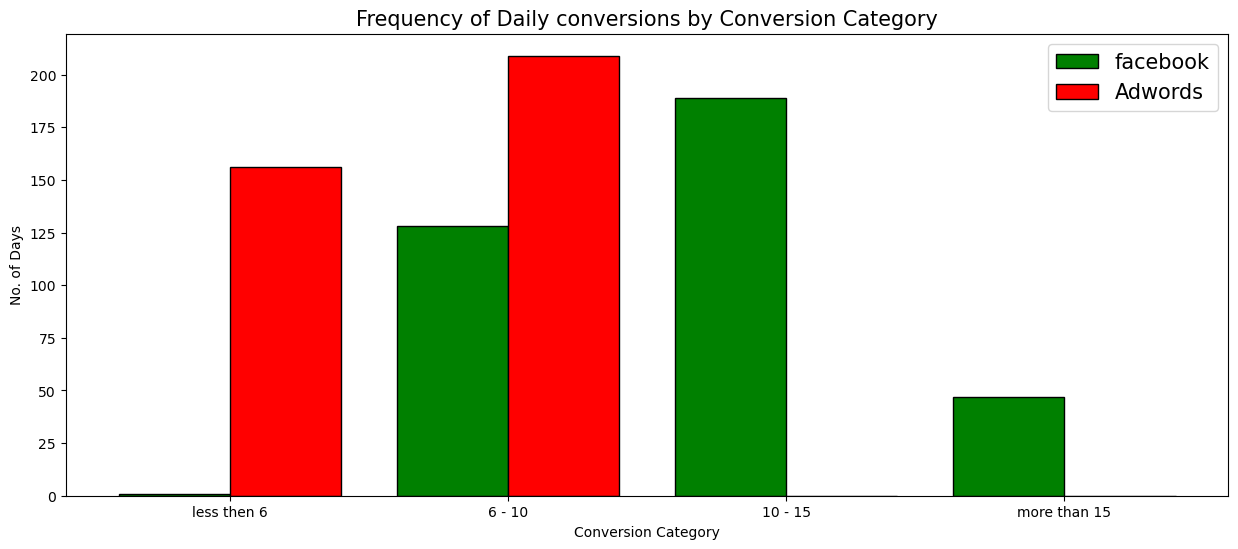

In [25]:
plt.figure(figsize=(15,6))
plt.bar(X_axis - 0.2,category_df['count_x'],0.4,label = 'facebook',color = 'green',linewidth = 1,edgecolor='k')
plt.bar(X_axis + 0.2,category_df['count_y'],0.4,label = 'Adwords',color = 'red',linewidth = 1,edgecolor='k')

plt.xticks(X_axis,category_df['Category'])
plt.xlabel('Conversion Category')
plt.ylabel("No. of Days")
plt.title("Frequency of Daily conversions by Conversion Category",fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

The above graph suggests that facebook has high conversion rates in more categories like 6-10 10-15 , while having very few in less than 6 category.
It is quite evident that adwords have no data in category 10-15 and more than 15 .So one needs to look what strategy they were following.

In [27]:
## Do more clicks on the ad really lead to more sales?

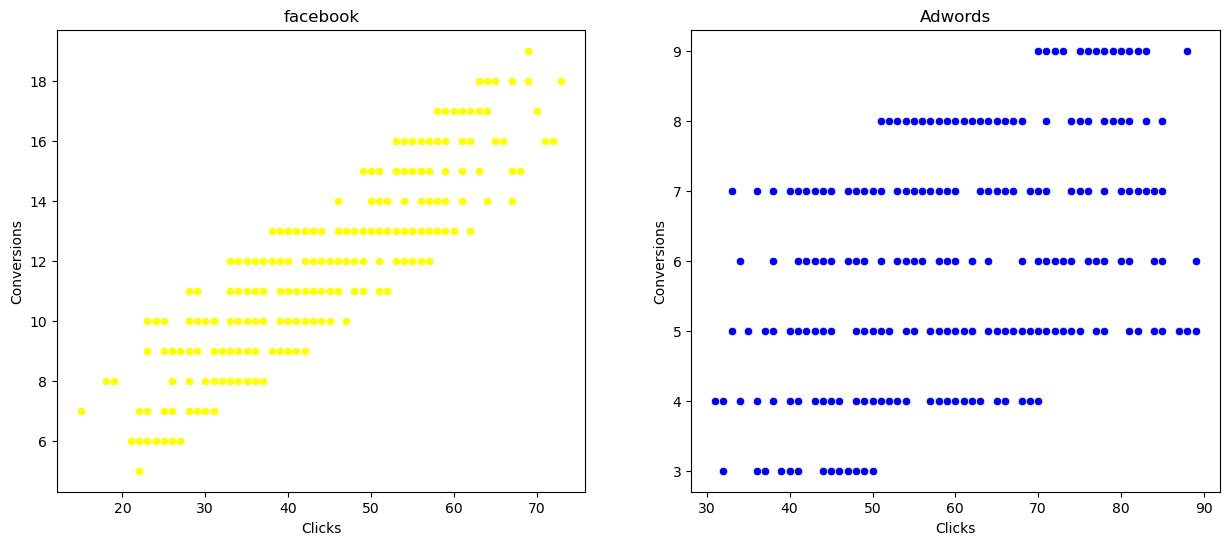

In [28]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.title('facebook')
sns.scatterplot(x=df_mar['Facebook Ad Clicks'],y=df_mar['Facebook Ad Conversions'],color ='yellow')
plt.xlabel('Clicks')
plt.ylabel('Conversions')
plt.subplot(1,2,2)
plt.title('Adwords')
sns.scatterplot(x=df_mar['AdWords Ad Clicks'],y = df_mar['AdWords Ad Conversions'],color = 'blue')
plt.xlabel('Clicks')
plt.ylabel('Conversions')
plt.show()

So we observe that there is positive corelation between sales and conversions in both (facebook and ADwords).But it more strong in facebook as compare to adwords.

In [30]:
facebook_corr = df_mar[['Facebook Ad Conversions','Facebook Ad Clicks']].corr()
facebook_corr

,Facebook Ad Conversions,Facebook Ad Clicks
Facebook Ad Conversions,1.000000,0.873775
Facebook Ad Clicks,0.873775,1.000000


In [31]:
adwords_corr = df_mar[['AdWords Ad Conversions','AdWords Ad Clicks']].corr()
adwords_corr

,AdWords Ad Conversions,AdWords Ad Clicks
AdWords Ad Conversions,1.000000,0.447993
AdWords Ad Clicks,0.447993,1.000000


In [32]:
print('Facebook:',round(facebook_corr.values[0,1],2))
print('Adwords:',round(adwords_corr.values[0,1],2))

Facebook: 0.87
Adwords: 0.45


The correlation score again confirms that there is more strong relation between clicks and sales conversion in facebook than adwords. It suggests that marketing strategy of facebook is more effective and have more potential .

# Hypothesis Testing

Hypothesis: Advertising on facebook results in greater conversion compared to advertising on ADwords.

Null Hypothesis: There is no difference between conversions of facebook and adwords or the number of conversion from adwords is higher then facebook.

Alternate Hypotthesis: The number of conversion from facebook is greater than the number of conversions from adwords. 

In [35]:
print('Mean Conversion \n--------------')
print('Facebook :',round(df_mar['Facebook Ad Conversions'].mean(),2))
print('Adwords :',round(df_mar['AdWords Ad Conversions'].mean(),2))

t_stats,p_value = st.ttest_ind(a = df_mar['Facebook Ad Conversions'],b = df_mar['AdWords Ad Conversions'],equal_var = False)
print('\n T statistics', t_stats,'\np-value',p_value)

# comparing the p-value with the significance of 5%
if p_value < 0.05:
      print("\n p-value is less than significance value,Reject the null hypothesis")
else:
    print("\n p-value is greater than significance value,Accept the null hypothesis")


Mean Conversion 
--------------
Facebook : 11.74
Adwords : 5.98

 T statistics 32.88402060758184 
p-value 9.348918164530465e-134

 p-value is less than significance value,Reject the null hypothesis


Test Observations:
1. The mean of facebook ad conversions is greater than adwords , this again suggest that facebook advertising is more effective.
2. The t statistics 32.88 is a measure of difference between the means of the two groups relative to the variation within the groups. Its larger value shows that there is larger difference between means of the two groups.
3. The small p-value relative to significance value reflects strong evidence against null hypothesis.Thus we will reject null hypothesis and hence facebook has higher conversion than adwords.

# Regression Analysis 
What will be happen when I do go with the Facebook AD? How many facebook ad conversions can I except giver a certain number of facebook ad clicks?

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
X = df_mar[['Facebook Ad Clicks']]
Y = df_mar[['Facebook Ad Conversions']]

reg_model = LinearRegression()
reg_model.fit(X,Y)
prediction = reg_model.predict(X)

r2 = r2_score(Y,prediction)*100
mse = mean_squared_error(Y,prediction)
print("Accuracy {R 2 Score}:",round(r2,2),'%')
print("Mean Squared Error",round(mse,2))

Accuracy {R 2 Score}: 76.35 %
Mean Squared Error 2.02


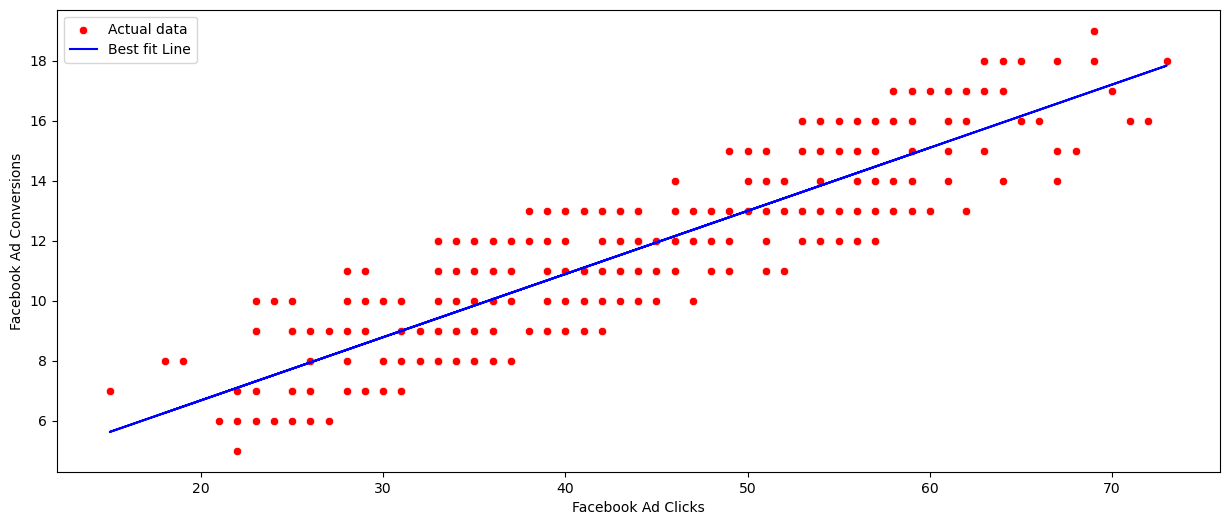

In [39]:
plt.figure(figsize=(15,6))
sns.scatterplot(x= df_mar['Facebook Ad Clicks'],y = df_mar['Facebook Ad Conversions'], color = 'r',label = 'Actual data')
plt.plot(df_mar['Facebook Ad Clicks'],prediction,color='b',label = 'Best fit Line')
plt.legend()
plt.show()

In [40]:
print(f'for {50} Clicks, Expected Conversions : {round(reg_model.predict([[50]])[0][0],2)}')
print(f'for {80} Clicks, Expected Conversions : {round(reg_model.predict([[80]])[0][0],2)}')

for 50 Clicks, Expected Conversions : 13.0
for 80 Clicks, Expected Conversions : 19.31


The model is having reasonably fine predictive power with R2 Score of 76 % . This suggests that it can effectively predict facebook ad conversions based on the number of facebook ad clicks. This can help business to make informed decision making about good resource allocation, budget planning and compaign oprimization.